In [1]:
from __future__ import division
import numpy as np

In [2]:
class Two_layer_NN(object):
    def __init__(self, input_size, hidden_size, output_size, std=1e-4):
        
        self.params = {}
        self.params['w1'] = std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['w2'] = std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def loss_grad(self, X, y = None, reg=0.0):
        
        w1,b1 = self.params['w1'],self.params['b1']
        w2,b2 = self.params['w2'],self.params['b2']
        N, D = X.shape
        #compute the forward pass
        
        scores=None
        z1=np.dot(X,w1) + b1
        a1=np.maximum(0, z1); #Relu layer
        scores=np.dot(a1, w2) + b2
        
        if y is None:
            return scores
        
        else:
            #compute loss and gradient
            
            exp_scores=np.exp(scores)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
            
            corect_logprobs = -np.log(probs[range(N),y])
            data_loss = np.sum(corect_logprobs) / N
            reg_loss = 0.5 * reg * np.sum(w1 * w1) + 0.5 * reg * np.sum(w2 * w2)
            loss = data_loss + reg_loss
            
            #grads
            
            grads={}
            dscores = probs
            dscores[range(N),y] -= 1
            dscores /= N

            # W2 and b2
            grads['w2'] = np.dot(a1.T, dscores)
            grads['b2'] = np.sum(dscores, axis=0)
            # next backprop into hidden layer
            dhidden = np.dot(dscores, w2.T)
            # backprop the ReLU non-linearity
            dhidden[a1 <= 0] = 0
            # finally into W,b
            grads['w1'] = np.dot(X.T, dhidden)
            grads['b1'] = np.sum(dhidden, axis=0)

            # add regularization gradient contribution
            grads['w2'] += reg * w2
            grads['w1'] += reg * w1
            
            return loss,grads
        
    def train(self, X, y, X_val, y_val, learning_rate=1e-3, learning_rate_decay=1, reg=1e-5, num_epochs=200, verbose=True):
        
        num_train = X.shape[0]
        
        it=num_epochs*10
        
        
        for it in xrange(it):
           
            loss, grads = self.loss_grad(X, y=y, reg=reg)
            #loss_history.append(loss)
            
            
            
            self.params['w1'] =self.params['w1'] - (learning_rate * grads['w1'])
            self.params['b1'] =self.params['b1'] - (learning_rate * grads['b1'])
            self.params['w2'] =self.params['w2'] - (learning_rate * grads['w2'])
            self.params['b2'] =self.params['b2'] - (learning_rate * grads['b2'])
            
           
            train_acc = (self.predict(X) == y).mean()
            val_acc = (self.predict(X_val) == y_val).mean()
            
            if verbose and it % 10 == 0:
                print 'epochs %d / %d: loss %f : training accuracy %f, and val accuracy %f' % (it/10, num_epochs, loss,train_acc, val_acc)
            
            #train_acc_history.append(train_acc)
            #val_acc_history.append(val_acc)
            
            
            learning_rate *= learning_rate_decay
             
        
    
    def predict(self, X):
        
        y_pred = None
        
        z1 = np.dot(X,self.params['w1']) + self.params['b1']
        a1 = np.maximum(0, z1) # pass through ReLU activation function
        scores = np.dot(a1,self.params['w2']) + self.params['b2']
        y_pred = np.argmax(scores, axis=1)
    
        return y_pred
    
        

In [3]:
def unpickle(file):
    import cPickle
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict

In [4]:
x_train = np.transpose(unpickle('cifar-10/data_batch_1')['data'])
#x_train=np.transpose(x_train)[0:20,:]
x_train=np.transpose(x_train)
y_train = unpickle('cifar-10/data_batch_1')['labels']
#y_train =y_train[0:20]

print np.shape(x_train),'\n',np.shape(y_train),'\n',y_train[6],'\n',y_train

(10000, 3072) 
(10000,) 
2 
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1,

In [5]:
net=Two_layer_NN(32*32*3, 50, 10)
loss,g=net.loss_grad(x_train,y=y_train)
print loss

2.302580936246871


In [6]:
net.train(x_train,y_train,x_train,y_train,learning_rate=1e-4,learning_rate_decay=1,num_epochs=1500,reg=0.000001)

epochs 0 / 1500: loss 2.302581 : training accuracy 0.104400, and val accuracy 0.104400
epochs 1 / 1500: loss 2.302526 : training accuracy 0.119900, and val accuracy 0.119900
epochs 2 / 1500: loss 2.302460 : training accuracy 0.103600, and val accuracy 0.103600
epochs 3 / 1500: loss 2.302374 : training accuracy 0.100500, and val accuracy 0.100500
epochs 4 / 1500: loss 2.302246 : training accuracy 0.100500, and val accuracy 0.100500
epochs 5 / 1500: loss 2.302047 : training accuracy 0.100500, and val accuracy 0.100500
epochs 6 / 1500: loss 2.301737 : training accuracy 0.100500, and val accuracy 0.100500
epochs 7 / 1500: loss 2.301253 : training accuracy 0.100500, and val accuracy 0.100500
epochs 8 / 1500: loss 2.300506 : training accuracy 0.100500, and val accuracy 0.100500
epochs 9 / 1500: loss 2.299388 : training accuracy 0.100500, and val accuracy 0.100500
epochs 10 / 1500: loss 2.297788 : training accuracy 0.100500, and val accuracy 0.100500
epochs 11 / 1500: loss 2.295628 : training

In [7]:
w1=net.params['w1']
b1=net.params['b1']
w2=net.params['w2']
b2=net.params['b2']

In [25]:
x_test = np.transpose(unpickle('cifar-10/data_batch_4')['data'])
#x_train=np.transpose(x_train)[0:20,:]
x_test=np.transpose(x_test)
y_test = unpickle('cifar-10/data_batch_4')['labels']
#y_train =y_train[0:20]

print np.shape(x_test),'\n',np.shape(y_test),'\n',y_test[6]

(10000, 3072) 
(10000,) 
1


In [26]:
def accuracy(X, y):
        
    y_pred = None
        
    z1 = np.dot(X,w1) + b1
    a1 = np.maximum(0, z1) # pass through ReLU activation function
    scores = np.dot(a1,w2) + b2
    y_pred = np.argmax(scores, axis=1)
    acc = (y_pred == y).mean()
    
    return y_pred,acc

In [27]:
pred,acc=accuracy(x_test,y_test)
print acc

0.3962


In [28]:
print pred

[8 6 4 ... 3 4 8]


In [29]:
def name(n):
    if(n == 0): return 'airplane'
    elif(n == 1): return 'Automobile'
    elif(n == 2): return 'Bird'
    elif(n == 3): return 'Cat'
    elif(n == 4): return 'Deer'
    elif(n == 5): return 'Dog'
    elif(n == 6): return 'Frog'
    elif(n == 7): return 'Horse'
    elif(n == 8): return 'Ship'
    elif(n == 9): return 'Truck'
    else: return 'none'

Ship


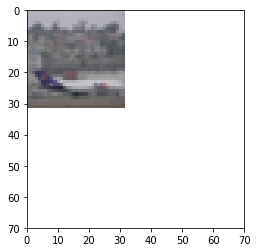

In [30]:

import matplotlib.pyplot as plt
%matplotlib inline

single_img=x_test[0]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[0]) 



Frog


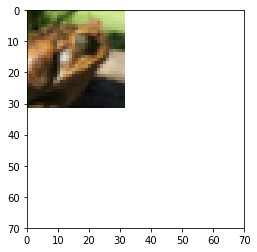

In [33]:
single_img=x_test[1]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[1]) 

Deer


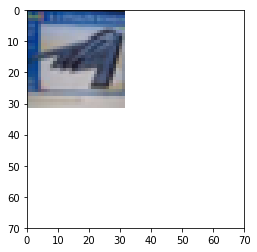

In [34]:
single_img=x_test[2]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[2]) 

Frog


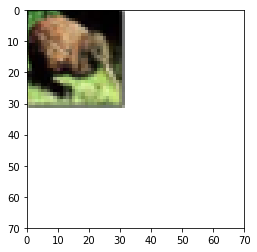

In [35]:
single_img=x_test[3]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[3]) 

Horse


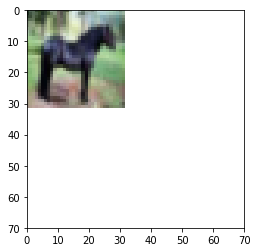

In [17]:
single_img=x_test[4]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[4]) 

Deer


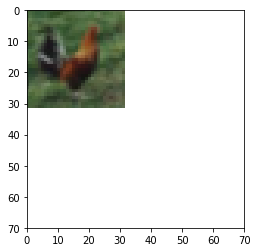

In [18]:
single_img=x_test[5]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[5]) 

Truck


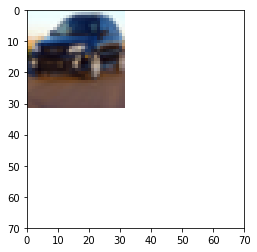

In [19]:
single_img=x_test[6]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[6]) 

Dog


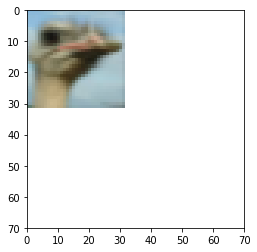

In [20]:
single_img=x_test[7]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[7]) 

Deer


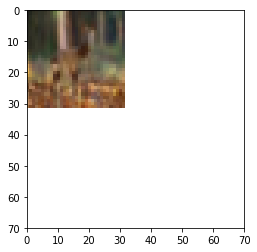

In [21]:
single_img=x_test[8]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[8]) 

Automobile


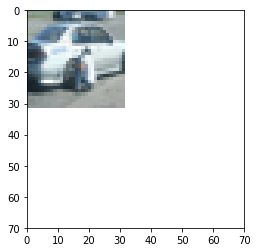

In [22]:
single_img=x_test[9]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[9]) 

Dog


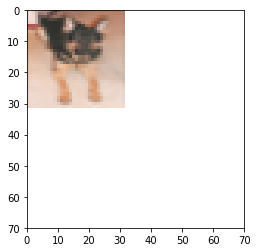

In [23]:
single_img=x_test[10]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[10]) 

Frog


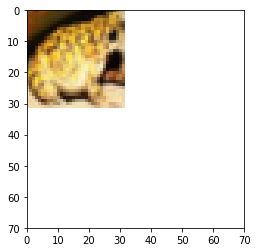

In [24]:
single_img=x_test[11]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[11]) 

Cat


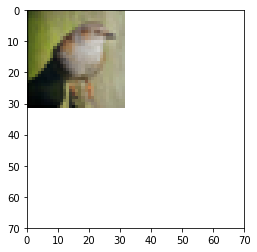

In [46]:
single_img=x_test[139]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[12]) 

Dog


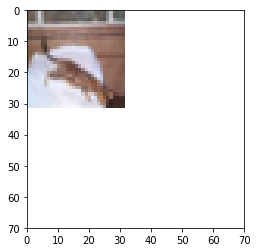

In [147]:
single_img=x_test[13]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[13]) 

Truck


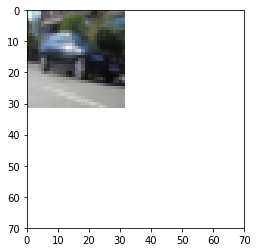

In [148]:
single_img=x_test[14]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[14]) 

Cat


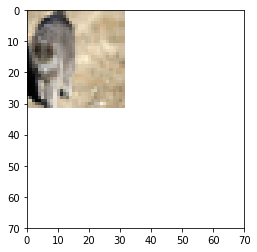

In [149]:
single_img=x_test[15]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[15]) 

Dog


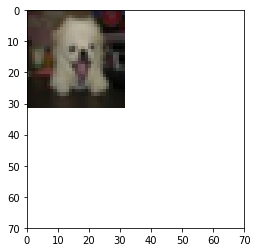

In [150]:
single_img=x_test[16]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[16]) 

Deer


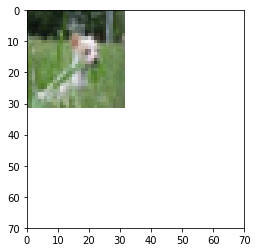

In [151]:
single_img=x_test[17]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[17]) 

Automobile


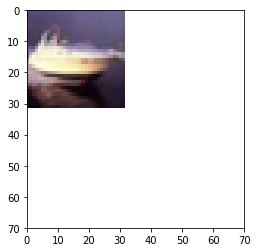

In [152]:
single_img=x_test[18]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[18]) 

Automobile


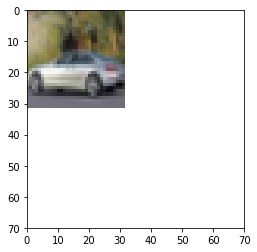

In [153]:
single_img=x_test[19]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[19]) 

Deer


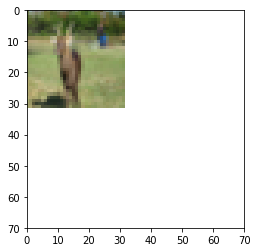

In [154]:
single_img=x_test[20]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[20]) 

Cat


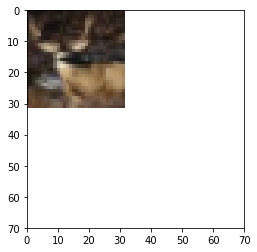

In [44]:
single_img=x_test[291]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[21]) 

In [42]:
single_img=x_test[]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[22]) 

SyntaxError: invalid syntax (<ipython-input-42-0348c57876c8>, line 1)

Automobile


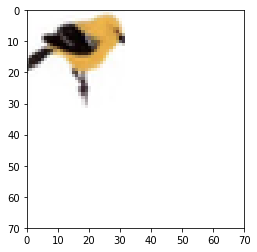

In [40]:
single_img=x_test[23]
#single_img_reshaped = single_img.reshape(32,32,3)
single_img_reshaped1 = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
plt.imshow(single_img_reshaped1,clim=(0.0, 0.5))
plt.axis([0,70,70,0])
print name(pred[23]) 

In [167]:
net=Two_layer_NN(32*32*3, 50, 10)
loss,g=net.loss_grad(x_train,y=y_train)
print loss
net.train(x_train,y_train,x_train,y_train,learning_rate=1e-4,learning_rate_decay=1,num_epochs=2500,reg=0.000001)

2.3025945583820104
epochs 0 / 2500: loss 2.302595 : training accuracy 0.104500, and val accuracy 0.104500
epochs 1 / 2500: loss 2.302542 : training accuracy 0.102900, and val accuracy 0.102900
epochs 2 / 2500: loss 2.302480 : training accuracy 0.102700, and val accuracy 0.102700
epochs 3 / 2500: loss 2.302394 : training accuracy 0.102700, and val accuracy 0.102700
epochs 4 / 2500: loss 2.302263 : training accuracy 0.105400, and val accuracy 0.105400
epochs 5 / 2500: loss 2.302059 : training accuracy 0.116900, and val accuracy 0.116900
epochs 6 / 2500: loss 2.301742 : training accuracy 0.129100, and val accuracy 0.129100
epochs 7 / 2500: loss 2.301246 : training accuracy 0.122800, and val accuracy 0.122800
epochs 8 / 2500: loss 2.300488 : training accuracy 0.112400, and val accuracy 0.112400
epochs 9 / 2500: loss 2.299365 : training accuracy 0.105500, and val accuracy 0.105500
epochs 10 / 2500: loss 2.297786 : training accuracy 0.103000, and val accuracy 0.103000
epochs 11 / 2500: loss 

In [168]:
w1=net.params['w1']
b1=net.params['b1']
w2=net.params['w2']
b2=net.params['b2']

In [171]:
def accuracy2(X, y):
        
    y_pred = None
        
    z1 = np.dot(X,w1) + b1
    a1 = np.maximum(0, z1) # pass through ReLU activation function
    scores = np.dot(a1,w2) + b2
    y_pred = np.argmax(scores, axis=1)
    acc = (y_pred == y).mean()
    
    return y_pred,acc

In [172]:
pred,acc=accuracy2(x_test,y_test)
print acc

0.3974


In [6]:
net.train(x_train,y_train,x_train,y_train,learning_rate=1e-4,learning_rate_decay=1,num_epochs=400,reg=0.000001)

epochs 0 / 400: loss 2.302561 : training accuracy 0.134000, and val accuracy 0.134000
epochs 1 / 400: loss 2.302511 : training accuracy 0.101100, and val accuracy 0.101100
epochs 2 / 400: loss 2.302441 : training accuracy 0.100600, and val accuracy 0.100600
epochs 3 / 400: loss 2.302339 : training accuracy 0.100600, and val accuracy 0.100600
epochs 4 / 400: loss 2.302181 : training accuracy 0.100500, and val accuracy 0.100500
epochs 5 / 400: loss 2.301932 : training accuracy 0.100500, and val accuracy 0.100500
epochs 6 / 400: loss 2.301537 : training accuracy 0.100500, and val accuracy 0.100500
epochs 7 / 400: loss 2.300919 : training accuracy 0.100500, and val accuracy 0.100500
epochs 8 / 400: loss 2.299973 : training accuracy 0.100500, and val accuracy 0.100500
epochs 9 / 400: loss 2.298586 : training accuracy 0.100500, and val accuracy 0.100500
epochs 10 / 400: loss 2.296664 : training accuracy 0.100500, and val accuracy 0.100500
epochs 11 / 400: loss 2.294167 : training accuracy 0.

In [6]:
net.train(x_train,y_train,x_train,y_train,learning_rate=1e-4,learning_rate_decay=1,num_epochs=100,reg=0.000001)

epochs 0 / 100: loss 2.302581 : training accuracy 0.085800, and val accuracy 0.085800
epochs 1 / 100: loss 2.302525 : training accuracy 0.104700, and val accuracy 0.104700
epochs 2 / 100: loss 2.302460 : training accuracy 0.103800, and val accuracy 0.103800
epochs 3 / 100: loss 2.302372 : training accuracy 0.106900, and val accuracy 0.106900
epochs 4 / 100: loss 2.302245 : training accuracy 0.118300, and val accuracy 0.118300
epochs 5 / 100: loss 2.302050 : training accuracy 0.128900, and val accuracy 0.128900
epochs 6 / 100: loss 2.301746 : training accuracy 0.129200, and val accuracy 0.129200
epochs 7 / 100: loss 2.301272 : training accuracy 0.121300, and val accuracy 0.121300
epochs 8 / 100: loss 2.300543 : training accuracy 0.112000, and val accuracy 0.112000
epochs 9 / 100: loss 2.299455 : training accuracy 0.104600, and val accuracy 0.104600
epochs 10 / 100: loss 2.297903 : training accuracy 0.101600, and val accuracy 0.101600
epochs 11 / 100: loss 2.295816 : training accuracy 0.

In [19]:
import random
max_count=2
for count in xrange(max_count):
    reg = 10 ** random.uniform(-5, 5)
    lr=10 ** random.uniform(-3, -6)
    
    net=Two_layer_NN(32*32*3, 50, 10)
    net.train(x_train,y_train,x_train,y_train,learning_rate=lr,learning_rate_decay=0.9,num_epochs=5,reg=reg)

iteration 0 / 5: loss 12.517379 : training accuracy 0.107100, and val accuracy 0.107100
iteration 1 / 5: loss 2.302585 : training accuracy 0.103200, and val accuracy 0.103200
iteration 2 / 5: loss 2.302585 : training accuracy 0.103200, and val accuracy 0.103200
iteration 3 / 5: loss 2.302585 : training accuracy 0.103200, and val accuracy 0.103200
iteration 4 / 5: loss 2.302585 : training accuracy 0.103200, and val accuracy 0.103200
iteration 0 / 5: loss 2.302620 : training accuracy 0.094400, and val accuracy 0.094400
iteration 1 / 5: loss 2.302616 : training accuracy 0.093700, and val accuracy 0.093700
iteration 2 / 5: loss 2.302614 : training accuracy 0.093100, and val accuracy 0.093100
iteration 3 / 5: loss 2.302614 : training accuracy 0.092600, and val accuracy 0.092600
iteration 4 / 5: loss 2.302614 : training accuracy 0.092600, and val accuracy 0.092600
iteration 0 / 5: loss 2.302599 : training accuracy 0.105400, and val accuracy 0.105400
iteration 1 / 5: loss 2.302540 : training 